<a href="https://colab.research.google.com/github/afujii/class/blob/main/%E6%A5%BD%E8%AD%9C%E3%82%92%E6%89%B1%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プログラムで楽譜を扱う
music21 というMITで開発されたPython用の楽譜運用ライブラリの初歩的な使いかたを示します。はじめに環境を整えます。music21 は、単体で利用できます。Google Colabで結果を示すために、musescore や　xvfb を用意します。

In [ ]:
! pip install music21
! apt-get install musescore
! apt-get install xvfb

In [ ]:
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
# パスの設定（Jupyterと共通）
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['musicxmlPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

/usr/bin/Xvfb already running.


上記の設定は、以下を参考にしました。　\
https://qiita.com/Dr_Sin1/items/335999844e5a17fd7b6c \
まずは、音符を一つ表示します。レのシャープの2分音符です。

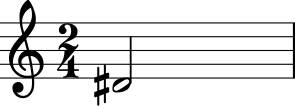

In [ ]:
from music21 import *

n = note.Note("D#")
n.duration.type = 'half'
n.show()

tinynotation と呼ばれる簡易型の記法が利用できるようです。
以下では、3/4拍子で、四分音符のド、八分音符のレとファ、16分音符のソラソファ＃　です。

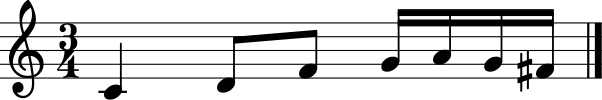

In [ ]:
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show()

上記の参考サイトでは、「以下のコマンドで、midi を鳴らすための小ウィンドウが現れてクリックできる」と述べていますが、本稿の著者の藤井による確認はできていません。

In [ ]:
littleMelody.show('midi')

corpus の利用が可能です。corpus とは、作曲家の作品を集約したものです。バッハのコラールを示します。

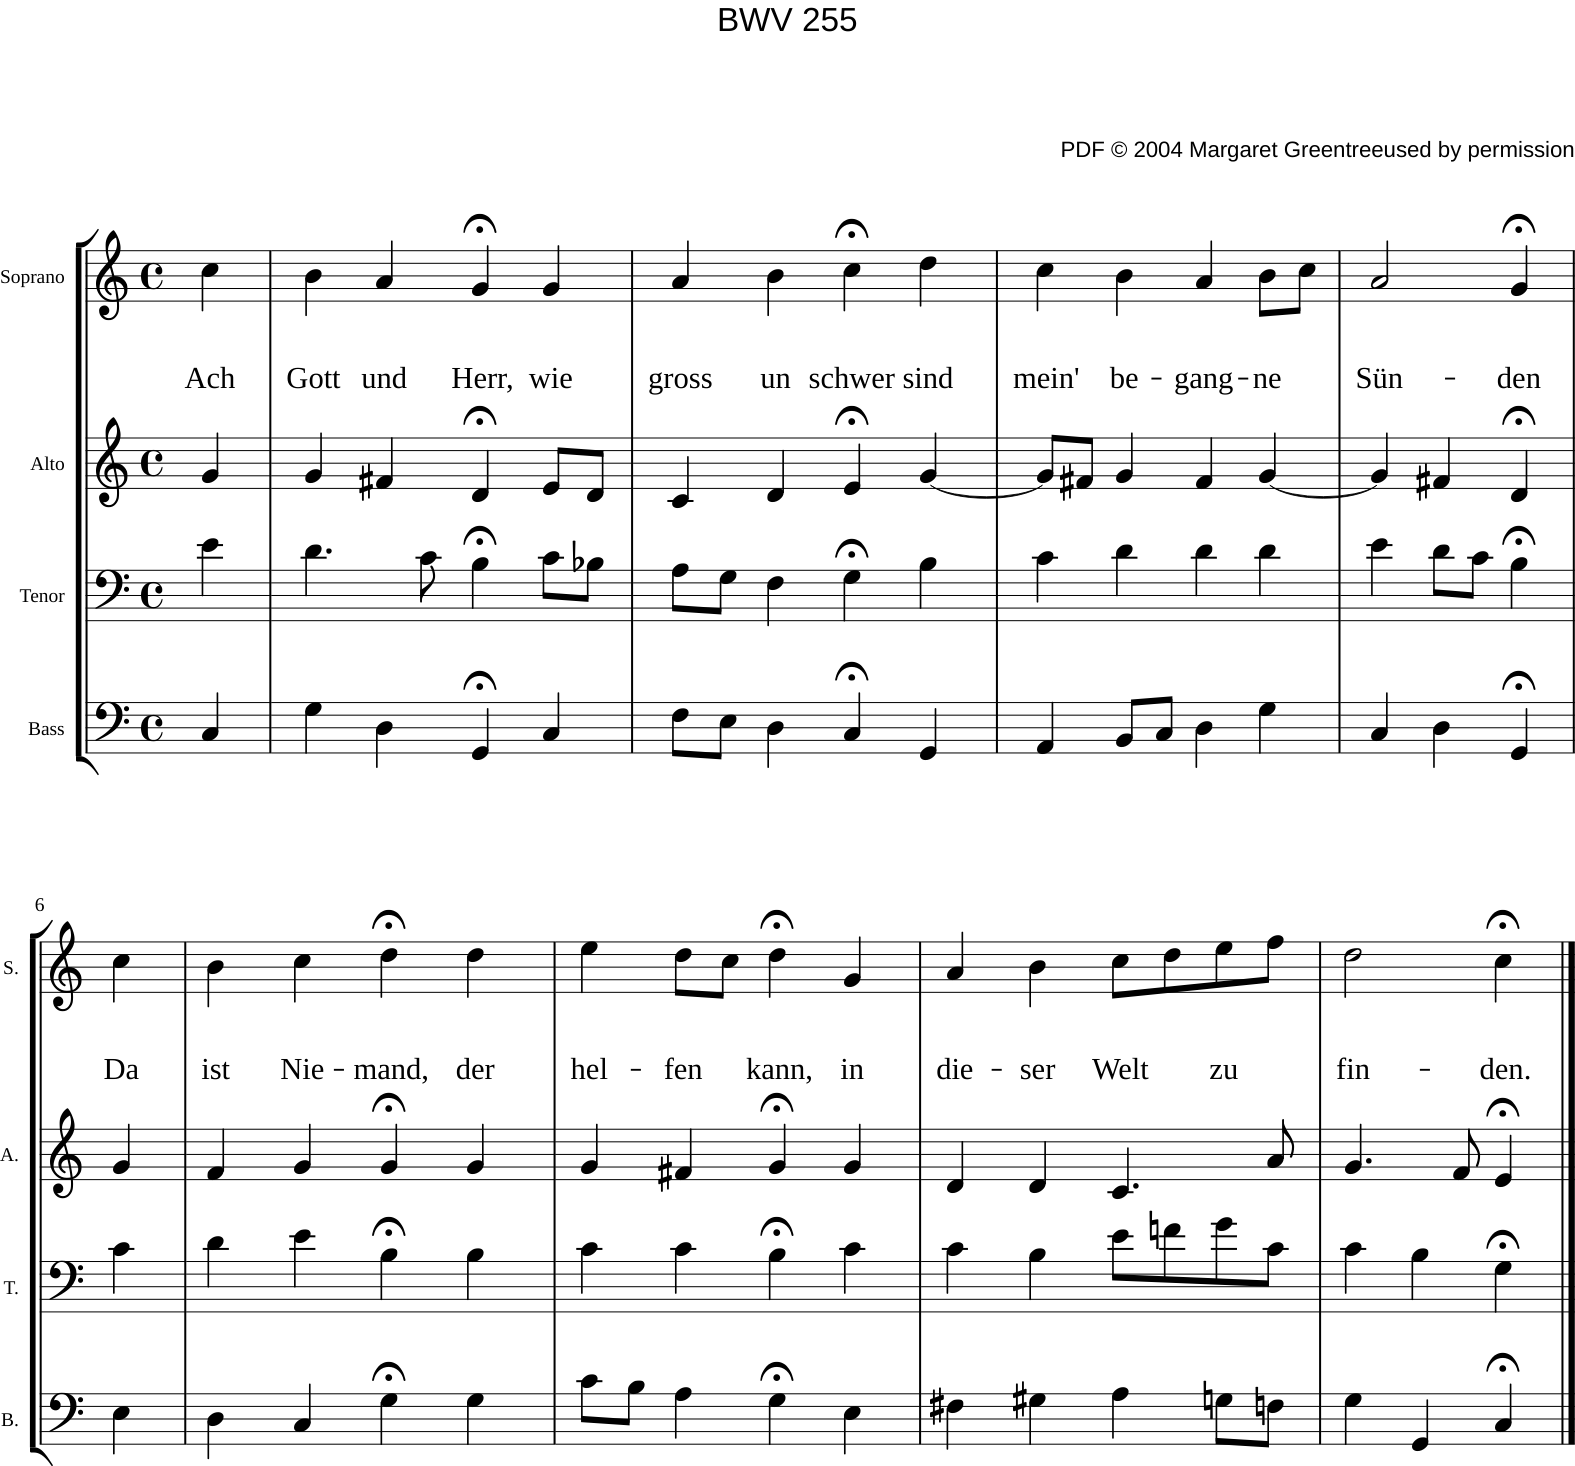

In [ ]:
bwv255 = corpus.parse('Bwv255')
bwv255.show()

曲中に含まれる音価の頻度分析も一行でできます。

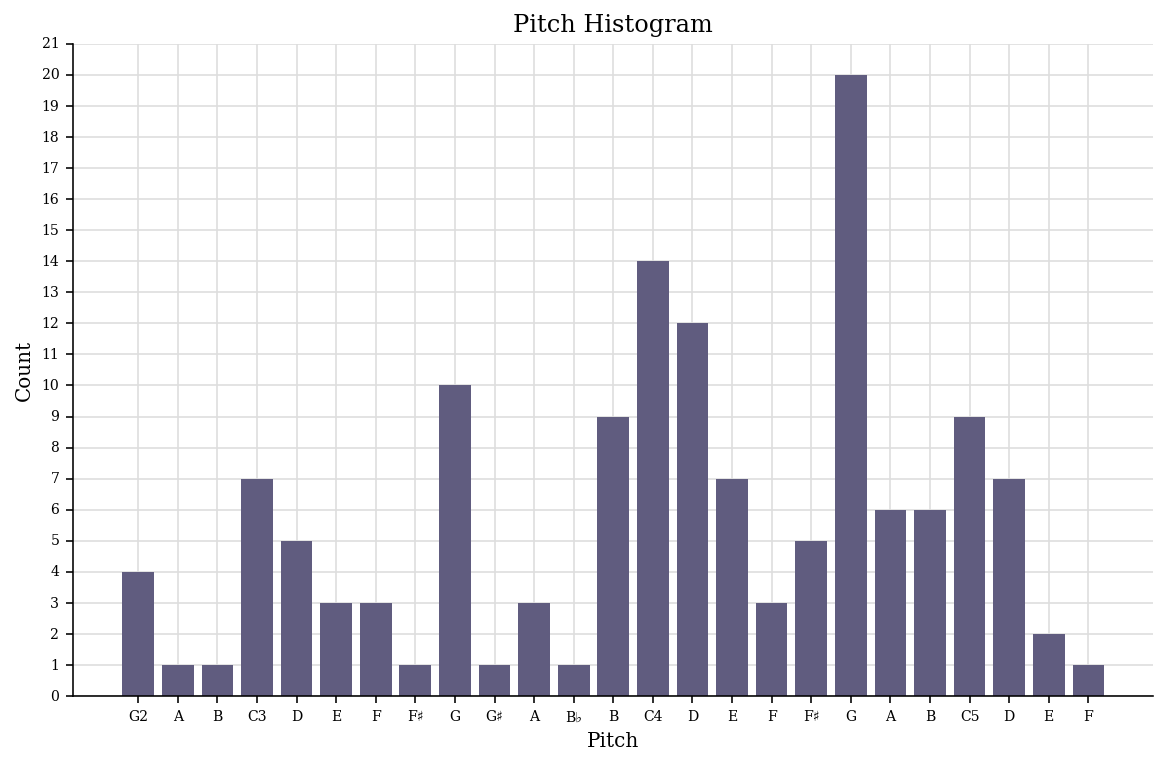

In [ ]:
bwv255.plot('histogram', 'pitch')